In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 95.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="qWquJGxPB8biIAgorUdD")
project = rf.workspace("pattern-lljk0").project("my-first-project-2-aqt5p")
version = project.version(15)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to My-First-Project-2-15 in yolov8:: 100%|██████████| 2790/2790 [00:00<00:00, 8108.81it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import os
import yaml
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

# Check the contents of your dataset folder
os.listdir("/content/My-First-Project-2-15")

['data.yaml',
 'test',
 'train',
 'valid',
 'README.roboflow.txt',
 'README.dataset.txt']



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



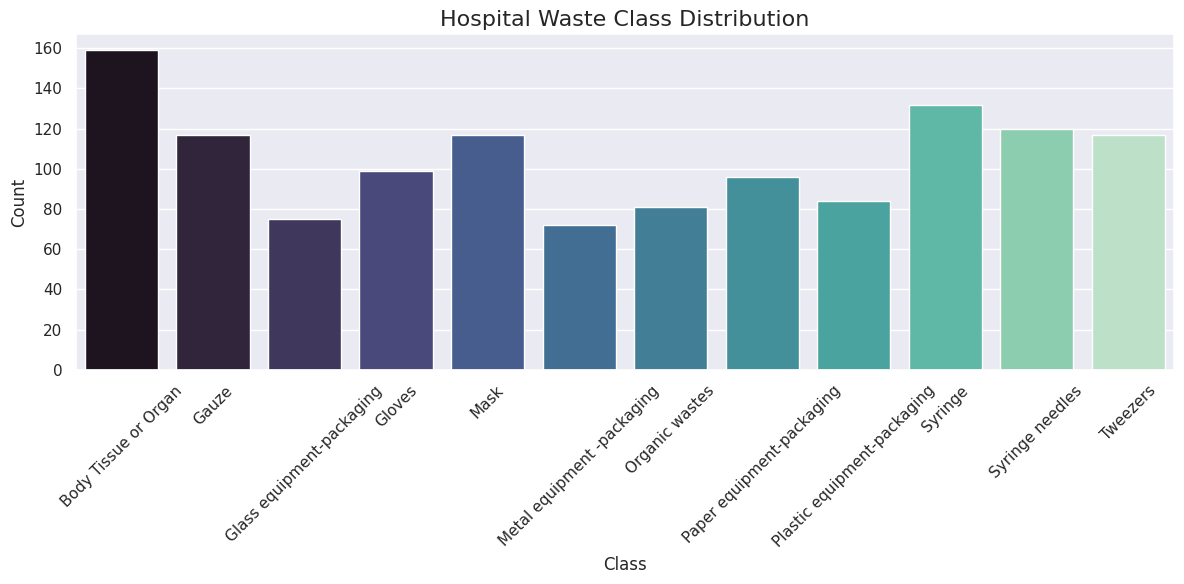

In [ ]:
yaml_path = "/content/My-First-Project-2-15/data.yaml"
with open(yaml_path, 'r') as f:
    data_yaml = yaml.safe_load(f)
classes = data_yaml['names']

label_dir = "/content/My-First-Project-2-15/train/labels"
class_counts = [0] * len(classes)

for label_file in os.listdir(label_dir):
    with open(os.path.join(label_dir, label_file), 'r') as f:
        for line in f:
            cls_id = int(line.split()[0])
            class_counts[cls_id] += 1

df = pd.DataFrame({"Class": classes, "Count": class_counts})
plt.figure(figsize=(12,6))
sns.barplot(x="Class", y="Count", data=df, palette="mako")
plt.title("Hospital Waste Class Distribution", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

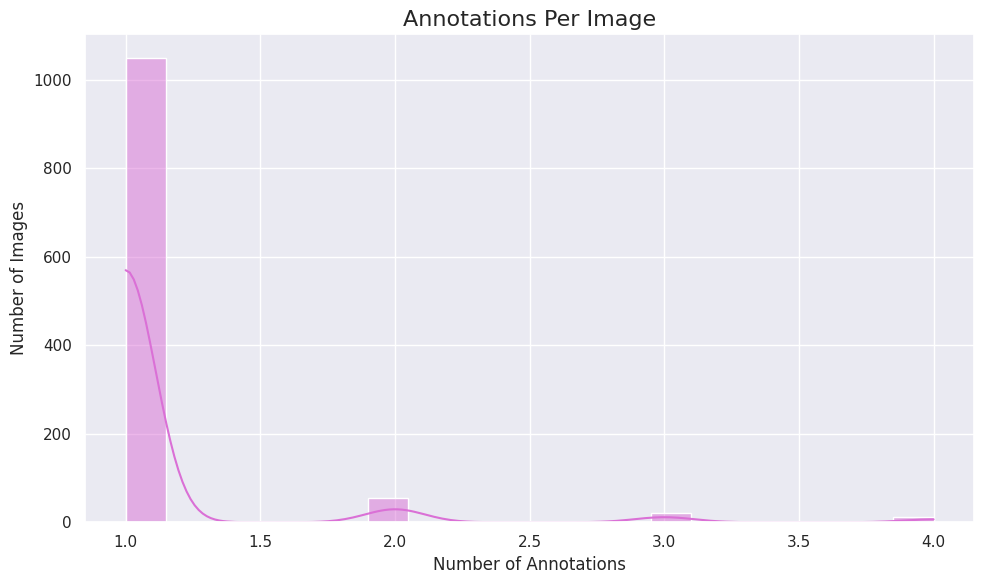

In [ ]:
annotations_per_image = []

for label_file in os.listdir(label_dir):
    with open(os.path.join(label_dir, label_file), 'r') as f:
        lines = f.readlines()
        annotations_per_image.append(len(lines))

plt.figure(figsize=(10,6))
sns.histplot(annotations_per_image, bins=20, kde=True, color="orchid")
plt.title("Annotations Per Image", fontsize=16)
plt.xlabel("Number of Annotations")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()

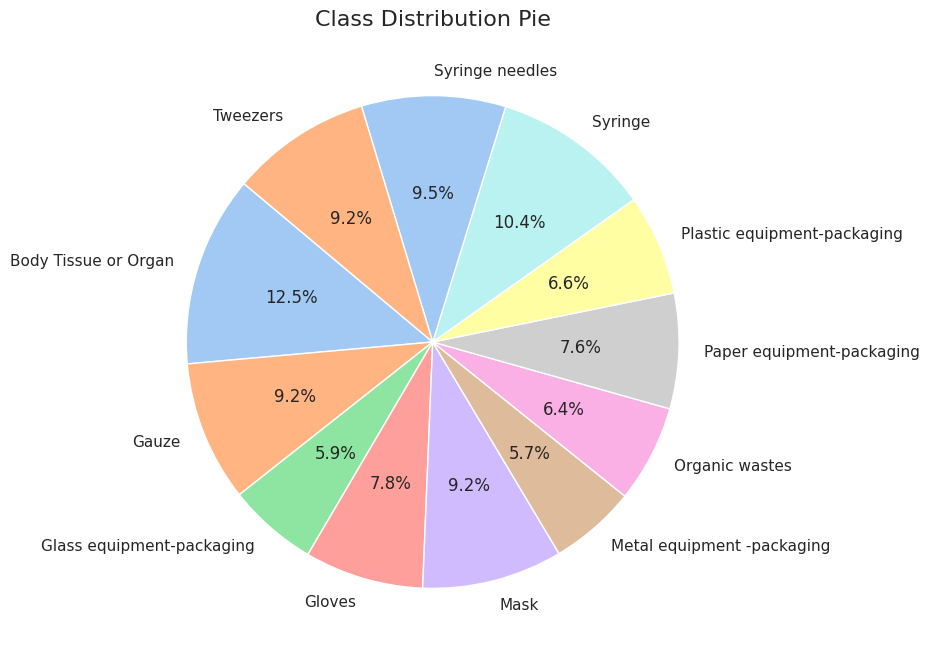

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(class_counts, labels=classes, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Class Distribution Pie", fontsize=16)
plt.show()

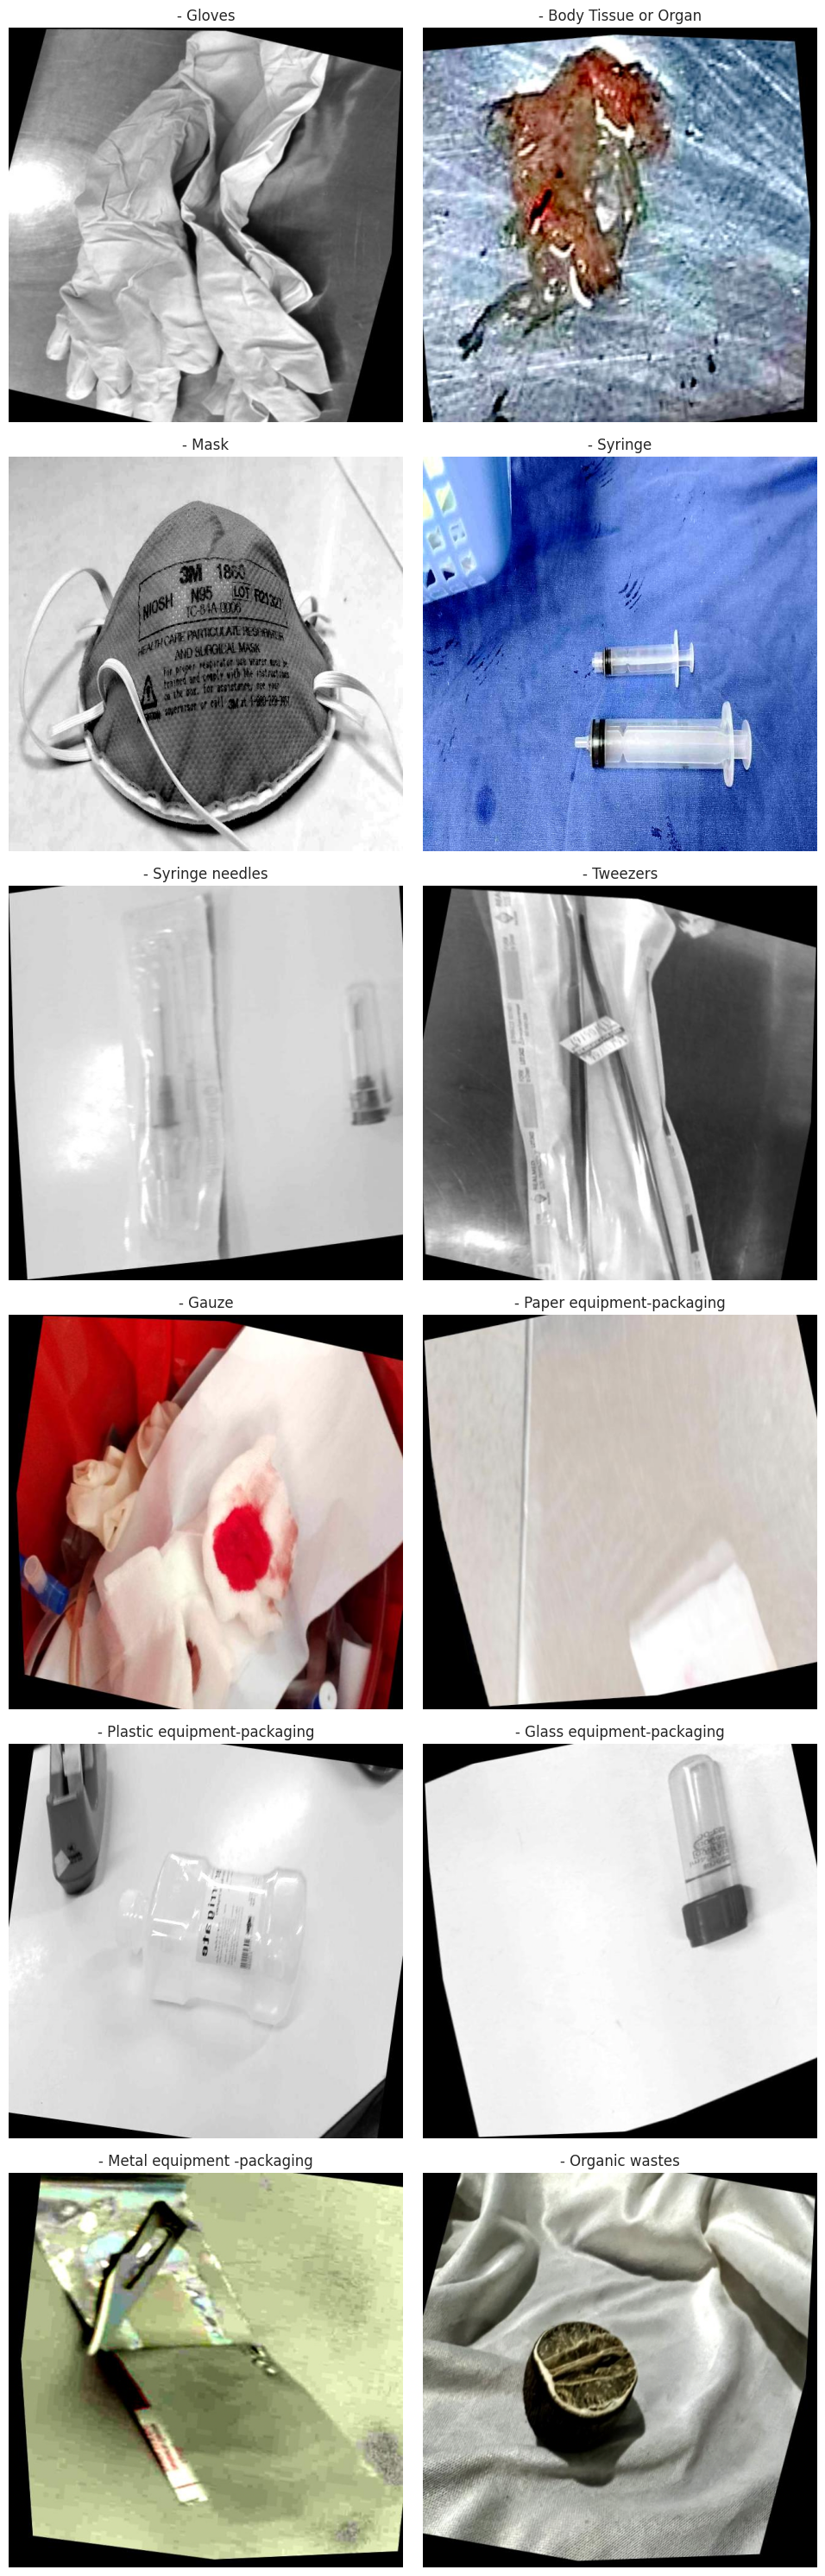

In [ ]:
import os, cv2, matplotlib.pyplot as plt

dataset = "/content/My-First-Project-2-15/train"
image_dir = os.path.join(dataset, "images")
label_dir = os.path.join(dataset, "labels")

with open("/content/My-First-Project-2-15/data.yaml") as f:
    classes = [line.strip().split(": ")[-1] for line in f if "-" in line]

shown = set()
imgs = []
titles = []

for file in os.listdir(label_dir):
    cid = int(open(os.path.join(label_dir, file)).readline().split()[0])
    if cid in shown:
        continue
    shown.add(cid)

    img_path = os.path.join(image_dir, file.replace(".txt", ".jpg"))
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgs.append(img)
    titles.append(classes[cid])

    if len(shown) == len(classes):
        break

cols = 2
rows = (len(imgs) + 1) // cols

plt.figure(figsize=(10, 5 * rows))
for i, (img, title) in enumerate(zip(imgs, titles)):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

model.train(
    data="/content/My-First-Project-2-15/data.yaml",
    epochs=30,
    batch=16,
    weight_decay=0.01,
)

100%|██████████| 6.25M/6.25M [00:00<00:00, 134MB/s]

Ultralytics 8.3.140 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/My-First-Project-2-15/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.

 15                  -1  1     37248  ultralytics.nn.modules.block.C2f             [192, 64, 1]                  
 16                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 18                  -1  1    123648  ultralytics.nn.modules.block.C2f             [192, 128, 1]                 
 19                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 21                  -1  1    493056  ultralytics.nn.modules.block.C2f             [384, 256, 1]                 
 22        [15, 18, 21]  1    753652  ultralytics.nn.modules.head.Detect           [12, [64, 128, 256]]          
Model summary: 129 layers, 3,013,188 parameters, 3,013,172 gradients, 8.2 GFLOPs

Transf

train: Scanning /content/My-First-Project-2-15/train/labels.cache... 1137 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1137/1137 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 385.7±59.9 MB/s, size: 39.0 KB)


val: Scanning /content/My-First-Project-2-15/valid/labels.cache... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.01), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      4.42G      1.386      3.774        1.8          4        640: 100%|██████████| 72/72 [00:20<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.50it/s]

                   all        127        139    0.00462      0.969      0.203     0.0861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      4.42G      1.353      2.912      1.746          2        640: 100%|██████████| 72/72 [00:20<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]

                   all        127        139      0.372      0.467      0.393      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      4.42G      1.354      2.542      1.758          1        640: 100%|██████████| 72/72 [00:19<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]

                   all        127        139      0.475      0.419       0.46      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.42G      1.363       2.35      1.756          2        640: 100%|██████████| 72/72 [00:19<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all        127        139      0.383       0.49      0.475      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.42G      1.338      2.204      1.712          3        640: 100%|██████████| 72/72 [00:19<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.20it/s]

                   all        127        139      0.699      0.579      0.683      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.42G      1.304      2.047      1.693          2        640: 100%|██████████| 72/72 [00:19<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.94it/s]

                   all        127        139      0.719      0.606      0.696       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.42G      1.321      1.984      1.687          5        640: 100%|██████████| 72/72 [00:18<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.19it/s]

                   all        127        139      0.792      0.692      0.798      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.42G      1.281      1.852      1.666          3        640: 100%|██████████| 72/72 [00:19<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.34it/s]

                   all        127        139      0.797      0.735      0.808      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      4.42G      1.237      1.816      1.615          2        640: 100%|██████████| 72/72 [00:18<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]

                   all        127        139      0.859      0.713      0.837      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      4.42G      1.275      1.723      1.657          1        640: 100%|██████████| 72/72 [00:18<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.38it/s]

                   all        127        139      0.711      0.718      0.782      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.42G      1.228      1.668      1.608          2        640: 100%|██████████| 72/72 [00:20<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.33it/s]

                   all        127        139      0.777      0.726      0.813      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      4.42G       1.24      1.656      1.627          1        640: 100%|██████████| 72/72 [00:19<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]

                   all        127        139      0.729       0.61      0.735      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      4.42G       1.22      1.563      1.599          4        640: 100%|██████████| 72/72 [00:19<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.55it/s]

                   all        127        139      0.776      0.767      0.842      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      4.42G      1.197      1.511      1.583          2        640: 100%|██████████| 72/72 [00:20<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]

                   all        127        139      0.775      0.799      0.824       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      4.42G      1.182      1.487      1.561          1        640: 100%|██████████| 72/72 [00:18<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.39it/s]

                   all        127        139      0.797      0.821      0.865       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      4.42G      1.182      1.393      1.544          7        640: 100%|██████████| 72/72 [00:19<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.41it/s]

                   all        127        139      0.877      0.773      0.879      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      4.42G      1.159      1.385      1.543          2        640: 100%|██████████| 72/72 [00:19<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all        127        139      0.767       0.72      0.809      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      4.42G      1.149      1.357       1.53          3        640: 100%|██████████| 72/72 [00:18<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.54it/s]

                   all        127        139      0.832      0.805      0.854      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      4.42G        1.1       1.38      1.494          1        640: 100%|██████████| 72/72 [00:20<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.77it/s]

                   all        127        139      0.784      0.834      0.876      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      4.42G      1.128      1.291      1.513          2        640: 100%|██████████| 72/72 [00:18<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]

                   all        127        139      0.851        0.8      0.846      0.443


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      4.42G      1.125      1.286      1.689          1        640: 100%|██████████| 72/72 [00:19<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.36it/s]

                   all        127        139      0.826       0.81      0.879      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      4.42G       1.11       1.13      1.656          1        640: 100%|██████████| 72/72 [00:18<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]

                   all        127        139      0.861      0.853      0.884      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      4.42G      1.038      1.039      1.602          1        640: 100%|██████████| 72/72 [00:17<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]

                   all        127        139       0.87      0.881      0.878      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      4.42G      1.045      1.026      1.616          1        640: 100%|██████████| 72/72 [00:18<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.57it/s]

                   all        127        139      0.903      0.877      0.907        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      4.42G       0.98     0.9829      1.542          1        640: 100%|██████████| 72/72 [00:17<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.49it/s]

                   all        127        139      0.884      0.896      0.917       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      4.42G      0.963     0.9467      1.515          1        640: 100%|██████████| 72/72 [00:19<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.67it/s]

                   all        127        139      0.873      0.872      0.871      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      4.42G      0.948     0.9324      1.527          1        640: 100%|██████████| 72/72 [00:17<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.30it/s]

                   all        127        139      0.893      0.858      0.894      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      4.42G     0.9283     0.9079      1.517          1        640: 100%|██████████| 72/72 [00:19<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.39it/s]

                   all        127        139      0.881      0.879      0.895       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      4.42G     0.9317      0.904      1.511          1        640: 100%|██████████| 72/72 [00:18<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]

                   all        127        139      0.888      0.892      0.882       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      4.42G        0.9      0.867       1.48          1        640: 100%|██████████| 72/72 [00:18<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.73it/s]

                   all        127        139        0.9      0.904      0.904      0.532



30 epochs completed in 0.174 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.3MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.140 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,988 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.40it/s]


                   all        127        139        0.9      0.904      0.903      0.532
  Body Tissue or Organ         19         19      0.764       0.68      0.752      0.391
                 Gauze          7         10      0.764        0.7      0.631       0.34
Glass equipment-packaging          8          8      0.906      0.875      0.877      0.599
                Gloves          6          6      0.933          1      0.995      0.672
                  Mask          6          9      0.838      0.889      0.874      0.511
Metal equipment -packaging         31         31      0.919      0.903      0.931      0.593
        Organic wastes         16         16          1      0.907      0.991      0.528
Paper equipment-packaging          7          7      0.751          1      0.837       0.49
Plastic equipment-packaging          6          6      0.992          1      0.995      0.682
               Syringe          6         10      0.976        0.9      0.966      0.597
      

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bd58b4d5d50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,  

In [ ]:
#print evaluation metrics
metrics = model.val()

Ultralytics 8.3.140 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,988 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 886.9±409.4 MB/s, size: 34.0 KB)


val: Scanning /content/My-First-Project-2-15/valid/labels.cache... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.14it/s]


                   all        127        139        0.9      0.904      0.903      0.533
  Body Tissue or Organ         19         19      0.763      0.678      0.752      0.399
                 Gauze          7         10      0.767        0.7      0.635      0.342
Glass equipment-packaging          8          8      0.906      0.875      0.877      0.599
                Gloves          6          6      0.933          1      0.995      0.672
                  Mask          6          9      0.838      0.889      0.874      0.511
Metal equipment -packaging         31         31      0.919      0.903      0.931      0.594
        Organic wastes         16         16          1      0.908      0.991      0.532
Paper equipment-packaging          7          7      0.752          1      0.837       0.49
Plastic equipment-packaging          6          6      0.991          1      0.995      0.682
               Syringe          6         10      0.976        0.9      0.962      0.597
      